In [1]:
import numpy as np
import emcee 
import matplotlib.pyplot as plt
import corner

In [12]:
reader = emcee.backends.HDFBackend("26_05_2022_14_50_34_1.h5")

In [13]:
samples = reader.get_chain(flat=True)

In [14]:
samples.shape

(1000000, 3)

(array([15084., 14111., 15021., 13906., 14490., 14358., 13905., 14378.,
        14647., 14101., 15221., 14160., 14207., 14549., 14510., 14584.,
        14228., 14405., 14221., 14642., 14398., 14010., 14462., 14550.,
        14363., 14003., 14253., 14163., 14322., 14103., 14390., 14714.,
        14224., 14188., 14138., 14520., 14360., 14230., 14489., 14621.,
        14209., 13851., 14340., 14056., 14106., 13998., 14131., 14307.,
        14408., 14177., 14248., 14457., 13822., 14166., 14227., 13876.,
        14461., 13733., 13856., 14308., 14277., 14465., 14198., 13728.,
        14343., 14176., 13804., 14376., 14236., 14431.]),
 array([-7.61206901e-05,  8.56384539e-02,  1.71353028e-01,  2.57067603e-01,
         3.42782178e-01,  4.28496752e-01,  5.14211327e-01,  5.99925901e-01,
         6.85640476e-01,  7.71355050e-01,  8.57069625e-01,  9.42784199e-01,
         1.02849877e+00,  1.11421335e+00,  1.19992792e+00,  1.28564250e+00,
         1.37135707e+00,  1.45707165e+00,  1.54278622e+00,  1.

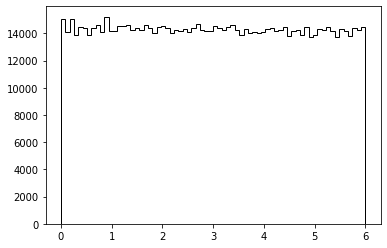

In [16]:
plt.hist(samples[:, 1], 70, color="k", histtype="step")

burn-in: 365
thin: 38
flat chain shape: (26210, 3)
flat log prob shape: (26210,)


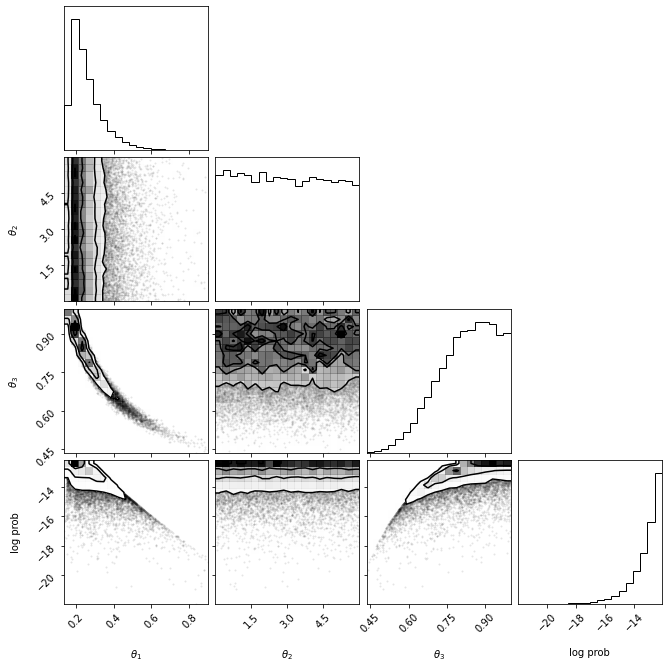

In [8]:
ndim=3
tau = reader.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))


samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
log_prob_samples = reader.get_log_prob(discard=burnin, flat=True, thin=thin)
#log_prior_samples = reader.get_blobs(discard=burnin, flat=True, thin=thin)

print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))
#print("flat log prior shape: {0}".format(log_prior_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels = list(map(r"$\theta_{{{0}}}$".format, range(1, ndim + 1)))
labels += ["log prob", "log prior"]

corner.corner(all_samples, labels=labels);


In [20]:
log_prob_samples = reader.get_log_prob(flat=True)

In [21]:
log_prob_samples.shape

(1000000,)

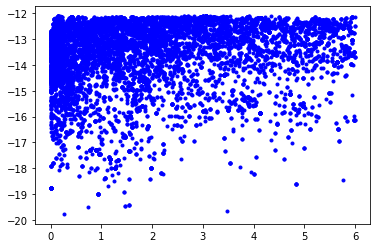

In [25]:
plt.plot(samples[:10000,1],log_prob_samples[:10000],"b.")